# Nonlinear vibrations<br>Part 2

## Van der Pol equation

### Limiting cycle

Method of averaging:

Van der Pol equation for autonomous system with negative damping

$$\ddot{x}-\epsilon(1-x^2)\dot{x}+x=0$$

Use method of averaging to estimate amplitude in case of small nonlinearity $\epsilon \ll 1$:

\begin{aligned}
x&=r\cos(t+\phi)\\
\dot{x}&=-r\sin(t+\phi)\\
\ddot{x}&=-\dot{r}\sin(t+\phi)-r\dot{\phi}\cos(t+\phi)-x
\end{aligned}

where equation for $\dot{x}$ holds if
$$\dot{r}\cos(t+\phi)-r\dot{\phi}\sin(t+\phi)=0$$

Substituting these equations into van der Pol equation yields

$$\dot{r}\sin(t+\phi)+r\dot{\phi}\cos(t+\phi)=-\epsilon(1-x^2)\dot{x}$$

The system can be solved for $\dot{r}$ and $\dot{\phi}$

\begin{aligned}
\dot{r}&=-\epsilon\sin(t+\phi)(1-x^2)\dot{x}\\
\dot{\phi}&=-\frac{1}{r}\epsilon\cos(t+\phi)(1-x^2)\dot{x}
\end{aligned}

Let $\tau=t+\phi$ and $\phi$ is considered almost constant in comparison with $t$ on period of $\sin t$. In this case

\begin{aligned}
\dot{r}&\approx-\epsilon r\frac{1}{2\pi}\int_0^{2\pi}\sin\tau\cdot(1-r^2\cos^2\tau)\sin\tau d\tau=\epsilon\frac{r}{2} \left(1-\frac{r^2}{4}\right)\\
\dot{\phi}&\approx-\epsilon\frac{1}{2\pi}\int_0^{2\pi}\cos\tau\cdot(1-r^2\cos^2\tau)\sin\tau d\tau=0
\end{aligned}

Staedy state solutions to $\dot{r}=0$ are $r=0$ and $r=2$ amplitudes. The first one is unstable singular point and $r=2$ corresponds to a stable limiting cycle.

$$\frac{2\epsilon}{r(1-r^2/4)}dr=dt$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp

In [2]:
r, phi, eps, t = sp.symbols('r, \phi, \epsilon, t')

In [3]:
x  =  r * sp.cos(t)
dx = -r * sp.sin(t)

F = eps * (1 - x**2) * dx

dr   = -sp.sin(t) * F
dphi = -sp.cos(t) * F

In [4]:
F

-\epsilon*r*(-r**2*cos(t)**2 + 1)*sin(t)

In [5]:
eq1 = (sp.integrate(dr, (t, 0, 2*sp.pi))/2/sp.pi).simplify()
eq1

\epsilon*r*(4 - r**2)/8

In [34]:
sp.integrate(dphi, (t,0,2*sp.pi))

0

1st equation has two solutions in steady state $r=0$ and $r=2$.

## Relaxation oscillations

## Numerical solution

In [19]:
# for numerical integration
def vdp(z, t, e):
    return [ z[1], -z[0] + e*(1-z[0]**2)*z[1] ]

In [20]:
def plot_solution(t, sol):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(t, sol[:,0])
    plt.xlabel('$t$')
    plt.ylabel('$x$')
    plt.subplot(1,2,2)
    plt.plot(sol[:,0], sol[:,1])
    plt.xlabel('$x$')
    plt.ylabel('$\dot{x}$')
    plt.grid(True)
    plt.show()

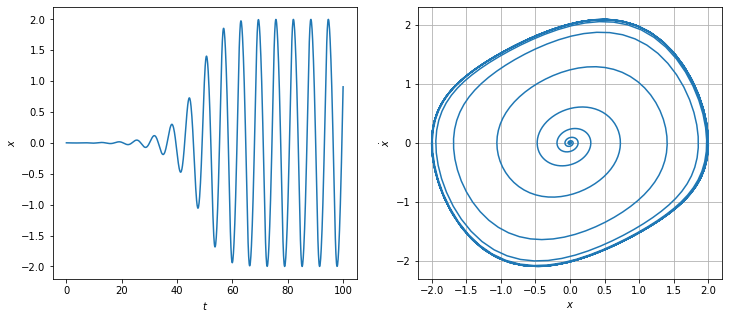

In [21]:
t = np.linspace(0, 100, 1000)
sol = odeint(vdp, [1e-3, 0], t, args=(0.3,))
plot_solution(t, sol)

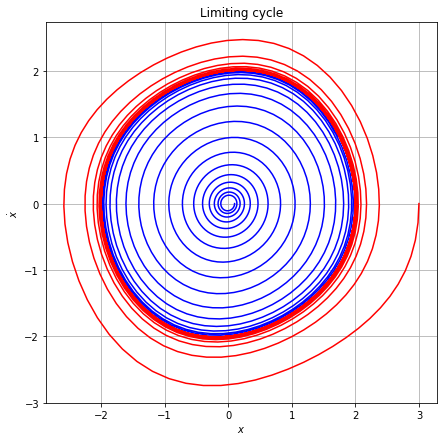

In [33]:
t = np.linspace(0, 100, 1000)

sol1 = odeint(vdp, [0.1, 0], t, args=(0.1,))
sol2 = odeint(vdp, [3.0, 0], t, args=(0.1,))

plt.figure(figsize=(7,7))
plt.plot(sol1[:,0],sol1[:,1],'b',sol2[:,0],sol2[:,1],'r')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.title('Limiting cycle')
plt.show()

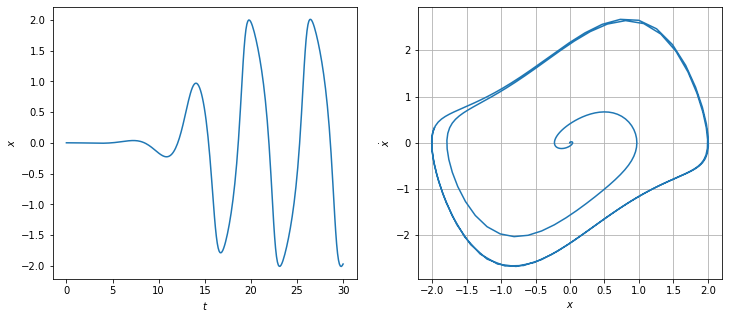

In [79]:
t = np.linspace(0, 30, 300)
sol = odeint(vdp, [1e-3, 0], t, args=(1,))
plot_solution(t, sol)

Relaxation oscillations similar to multivibrator at $\epsilon \gg 1$.

Period depends on $\epsilon$.

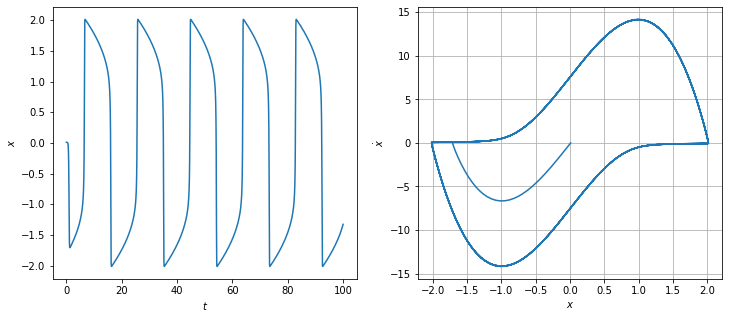

In [43]:
t = np.linspace(0, 100, 10000)
sol = odeint(vdp, [0.01, 0], t, args=(10,))
plot_solution(t, sol)

## Notes

"Dynamics of a System Exhibiting the Global Bifurcation of a Limit Cycle at Infinity" by W.L.Keith and R.H.Rand, Int. J. Non-Linear Mechanics, 20:325-338 (1985)